In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("dataset.csv")
dataset.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: ylabel='math score'>

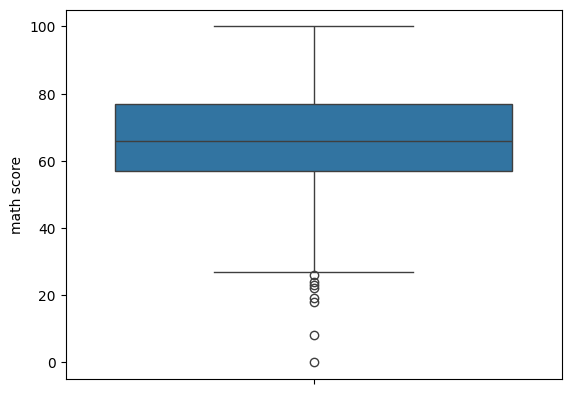

In [ ]:
#Now try to find outliners for math score
sns.boxplot(data=dataset["math score"])

<Axes: ylabel='reading score'>

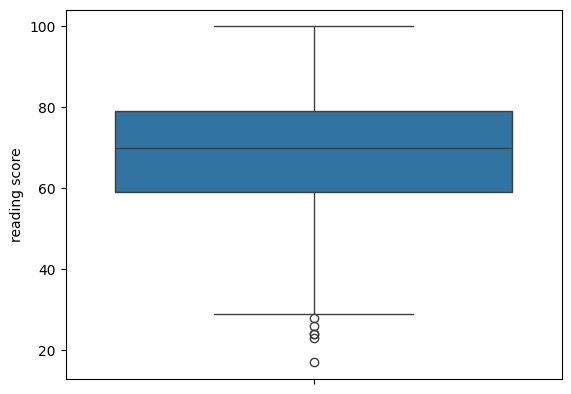

In [ ]:
#Now try to find outliners for reading score
sns.boxplot(data=dataset["reading score"])

<Axes: ylabel='writing score'>

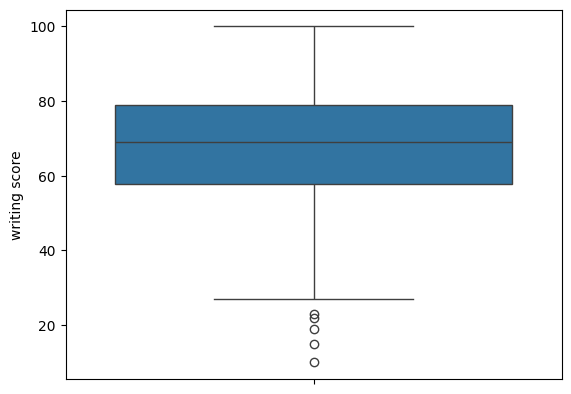

In [9]:
#Now try to find outliners for writing score
sns.boxplot(data=dataset["writing score"])

In [ ]:
def remove_oulinear(feature):
    q1=dataset[feature].quantile(0.25)
    q3=dataset[feature].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*q3
    upper_bound=q1+1.5*q3
    return dataset[(dataset[feature]>lower_bound)& (dataset[feature]<upper_bound)]


<Axes: xlabel='math score', ylabel='Count'>

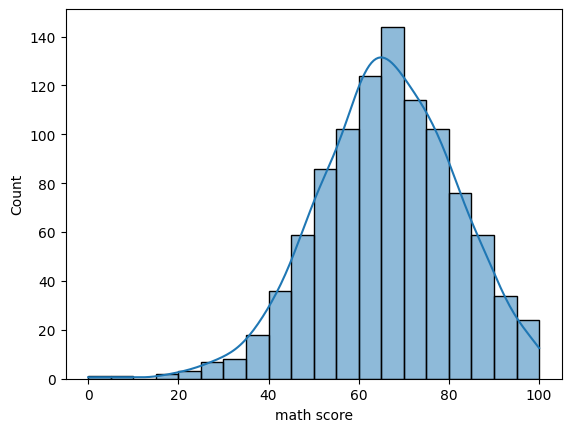

In [11]:
sns.histplot(data=dataset["math score"], bins=20, kde=True)

<Axes: xlabel='reading score', ylabel='Count'>

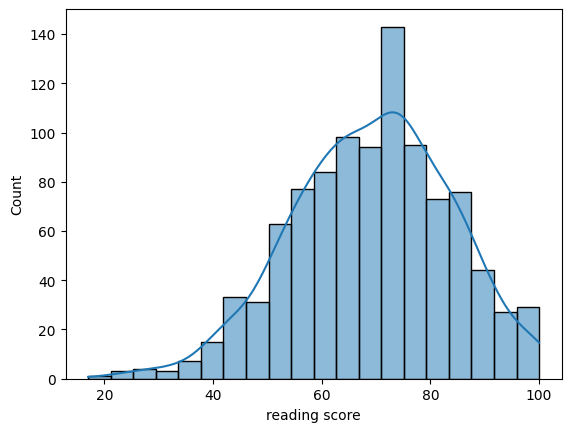

In [12]:
sns.histplot(data=dataset["reading score"], bins=20, kde=True)

<Axes: xlabel='writing score', ylabel='Count'>

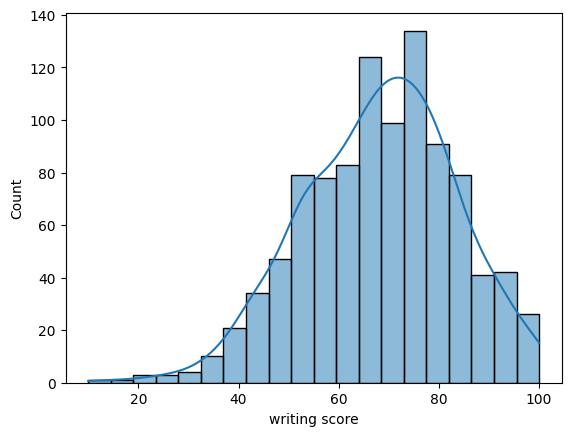

In [13]:
sns.histplot(data=dataset["writing score"], bins=20, kde=True)

In [23]:
dataset=remove_oulinear("math score")
dataset=remove_oulinear("reading score")
dataset=remove_oulinear("writing score")

<Axes: ylabel='reading score'>

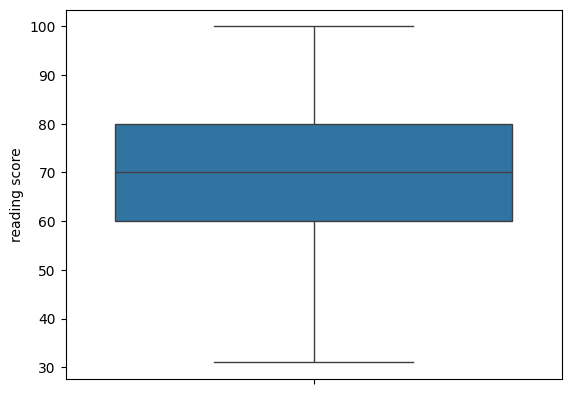

In [24]:
#Now try to find outliners for math score
sns.boxplot(data=dataset["reading score"])

<Axes: ylabel='writing score'>

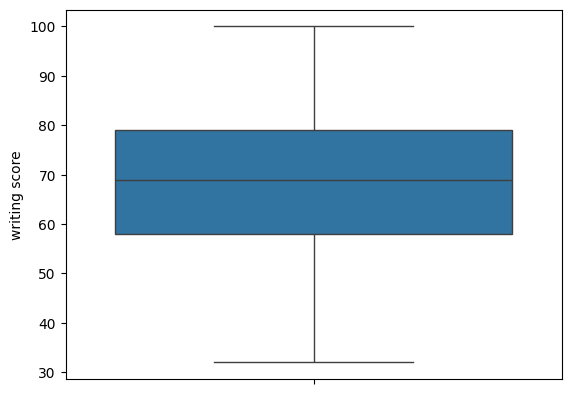

In [26]:
#Now try to find outliners for math score
sns.boxplot(data=dataset["writing score"])

<Axes: ylabel='math score'>

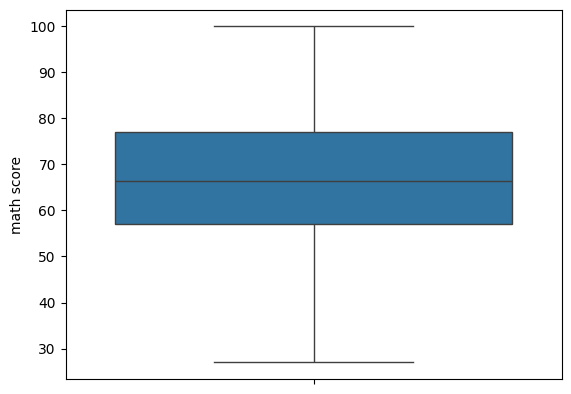

In [27]:
#Now try to find outliners for math score
sns.boxplot(data=dataset["math score"])

In [29]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["gender"]=encoder.fit_transform(dataset["gender"])
dataset["race/ethnicity"]=encoder.fit_transform(dataset["race/ethnicity"])
dataset["lunch"]=encoder.fit_transform(dataset["lunch"])
dataset["test preparation course"]=encoder.fit_transform(dataset["test preparation course"])
dataset["parental level of education"]=encoder.fit_transform(dataset["parental level of education"])


In [34]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [38]:
#Normalization using MinMax
def normalize(feature):
    global dataset
    dataset[feature]=(dataset[feature]-dataset[feature].min())/(dataset[feature].max()-dataset[feature].min())

In [40]:
normalize("math score")
normalize("reading score")
normalize("writing score")

<Axes: xlabel='math score', ylabel='Count'>

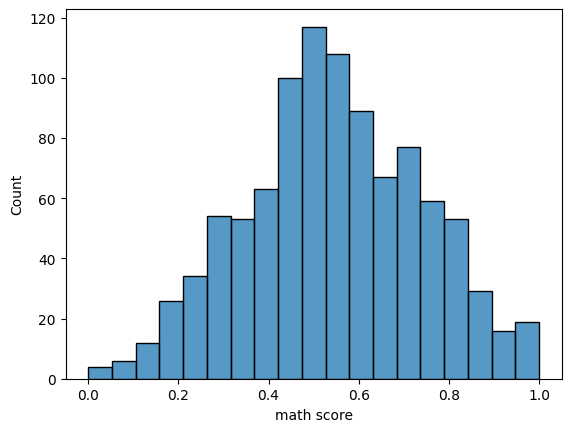

In [44]:
sns.histplot(data=dataset["math score"])